In [1]:
# instala o pacote sqldf 
# INSTALLING FROM CRAN
# Executar apenas na primeira vez
install.packages("sqldf")

also installing the dependencies 'memoise', 'gsubfn', 'proto', 'RSQLite', 'chron'



package 'memoise' successfully unpacked and MD5 sums checked
package 'gsubfn' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'chron' successfully unpacked and MD5 sums checked
package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Flora\AppData\Local\Temp\RtmpKg5qLM\downloaded_packages


In [1]:
install.packages("data.table")
install.packages("DataExplorer")

library(data.table)
library(DataExplorer)

package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Flora\AppData\Local\Temp\Rtmpkjp5E0\downloaded_packages
package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Flora\AppData\Local\Temp\Rtmpkjp5E0\downloaded_packages


In [22]:
source("https://raw.githubusercontent.com/claudioteix/RLibrary/master/MyLibrary.R")

In [2]:
library(sqldf)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [3]:
# Carrega o dataset criado no RStudio no servidor CEFET
# já com todas as cláusulas de data cleaning 
load("flights.Rda")

In [3]:
nrow(df10)

[1] 53705

In [4]:
head(df10)

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,autho_code,line_type,...,depart_visibility,depart_events,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_events,arrival_conditions
335324,SBBE,2009-01-01,07:00,SBEG,2009-01-01,05:00,GLO,1697,0,N,...,10,,Mostly Cloudy,26,23,83,1010,10,,Mostly Cloudy
335331,SBBE,2009-01-01,12:00,SBBR,2009-01-01,10:00,TAM,3716,0,E,...,20,,Scattered Clouds,31,25,79,1011,10,Rain,Mostly Cloudy
335406,SBBE,2009-01-03,12:00,SBFZ,2009-01-03,10:00,TAM,3890,0,N,...,10,,Mostly Cloudy,32,22,55,1010,10,,Scattered Clouds
335412,SBBE,2009-01-03,13:00,SBBR,2009-01-03,11:00,GLO,1928,0,N,...,10,Thunderstorm,Thunderstorm,30,25,74,1010,10,,Scattered Clouds
335421,SBBE,2009-01-03,22:00,SBFZ,2009-01-03,20:00,GLO,1830,0,N,...,10,,Scattered Clouds,27,23,79,1008,10,,Partly Cloudy
335445,SBBE,2009-01-04,15:00,SBFZ,2009-01-04,13:00,TAM,3454,0,N,...,10,,Scattered Clouds,26,22,78,1008,20,Rain,Partly Cloudy


In [5]:
str(df10)

'data.frame':	53705 obs. of  37 variables:
 $ destiny            : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ arrival_expect_date: chr  "2009-01-01" "2009-01-01" "2009-01-03" "2009-01-03" ...
 $ arrival_expect_hour: chr  "07:00" "12:00" "12:00" "13:00" ...
 $ origin             : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ depart_expect_date : chr  "2009-01-01" "2009-01-01" "2009-01-03" "2009-01-03" ...
 $ depart_expect_hour : chr  "05:00" "10:00" "10:00" "11:00" ...
 $ airline            : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight             : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ autho_code         : Factor w/ 11 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ line_type          : Factor w/ 10 levels "C","E","G","I",..: 6 2 6 6 6 6 4 6 6 6 ...
 $ depart_expect      : POSIXlt, format: "2009-01-01 05:50:00" "2009-

In [4]:
# Transforma o formato POSIXlt em chr
# para que possa ser trabalhado em conjunto com o sqldf
df10$depart_expect <- as.character(df10$depart_expect)
df10$depart <- as.character(df10$depart)
df10$arrival_expect <- as.character(df10$arrival_expect)
df10$arrival <- as.character(df10$arrival)

In [7]:
str(df10)

'data.frame':	53705 obs. of  37 variables:
 $ destiny            : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ arrival_expect_date: chr  "2009-01-01" "2009-01-01" "2009-01-03" "2009-01-03" ...
 $ arrival_expect_hour: chr  "07:00" "12:00" "12:00" "13:00" ...
 $ origin             : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ depart_expect_date : chr  "2009-01-01" "2009-01-01" "2009-01-03" "2009-01-03" ...
 $ depart_expect_hour : chr  "05:00" "10:00" "10:00" "11:00" ...
 $ airline            : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight             : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ autho_code         : Factor w/ 11 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ line_type          : Factor w/ 10 levels "C","E","G","I",..: 6 2 6 6 6 6 4 6 6 6 ...
 $ depart_expect      : chr  "2009-01-01 05:50:00" "2009-01-01 10:20:

In [5]:
query<-"select destiny, origin, airline, flight, depart, arrival, departure_delay, arrival_delay,"
query<-paste(query,"depart_temperature, depart_dew_point, depart_humidity, depart_pressure, depart_visibility, depart_conditions,", sep=" ")
query<-paste(query,"arrival_temperature, arrival_dew_point, arrival_humidity, arrival_pressure, arrival_visibility, arrival_conditions", sep=" ")
query<-paste(query, "from df10", sep=" ")
print(query)

[1] "select destiny, origin, airline, flight, depart, arrival, departure_delay, arrival_delay, depart_temperature, depart_dew_point, depart_humidity, depart_pressure, depart_visibility, depart_conditions, arrival_temperature, arrival_dew_point, arrival_humidity, arrival_pressure, arrival_visibility, arrival_conditions from df10"


In [6]:
train_set<-sqldf(query)

In [10]:
str(train_set)

'data.frame':	53705 obs. of  20 variables:
 $ destiny            : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin             : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline            : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight             : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ depart             : chr  "2009-01-01 06:51:00" "2009-01-01 11:25:00" "2009-01-03 11:18:00" "2009-01-03 12:04:00" ...
 $ arrival            : chr  "2009-01-01 09:00:00" "2009-01-01 14:02:00" "2009-01-03 13:06:00" "2009-01-03 14:46:00" ...
 $ departure_delay    : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay      : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_temperature : num  22 24 29 25 27 31 28 31 27 27 ...
 $ depart_dew_point   : num  21 16 22 19 22 22 23 22 24 23 ...
 $ depart_humidity    : num  94 61 66 69 74 58 7

In [7]:
# Carrega as bibliotecas necessárias para trabalhar com as transações e os algoritmos
library("arules")
library("arulesSequences")
library("arulesViz")

Warning message:
"package 'arules' was built under R version 3.4.4"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesSequences' was built under R version 3.4.4"Warning message:
"package 'arulesViz' was built under R version 3.4.4"Loading required package: grid


In [8]:
# Remove as características que não serão analisadas
train_set$depart_temperature <- NULL
train_set$depart_dew_point <- NULL
train_set$depart_humidity <- NULL
train_set$depart_pressure <- NULL
train_set$depart_visibility <- NULL
train_set$arrival_temperature <- NULL
train_set$arrival_dew_point <- NULL
train_set$arrival_humidity <- NULL
train_set$arrival_pressure <- NULL
train_set$arrival_visibility <- NULL

In [8]:
str(train_set)

'data.frame':	53705 obs. of  10 variables:
 $ destiny           : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin            : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline           : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight            : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ depart            : chr  "2009-01-01 06:51:00" "2009-01-01 11:25:00" "2009-01-03 11:18:00" "2009-01-03 12:04:00" ...
 $ arrival           : chr  "2009-01-01 09:00:00" "2009-01-01 14:02:00" "2009-01-03 13:06:00" "2009-01-03 14:46:00" ...
 $ departure_delay   : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay     : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_conditions : chr  "Mostly Cloudy" "Scattered Clouds" "Mostly Cloudy" "Thunderstorm" ...
 $ arrival_conditions: chr  "Mostly Cloudy" "Mostly Cloudy" "Scattered Clouds" "Scat

In [9]:
# cria duas listas com todos os valores da coluna depart (index column=5)
# já separados nos formatos YYYY-MM-DD e HH:MM:SS respectivamente
depart_d<-sapply(strsplit(train_set[,5], " ", fixed = TRUE), "[", 1)
depart_h<-sapply(strsplit(train_set[,5], " ", fixed = TRUE), "[", 2)

# cria duas listas com todos os valores da coluna arrival (index column=6)
# já separados nos formatos YYYY-MM-DD e HH:MM:SS respectivamente
arrival_d<-sapply(strsplit(train_set[,6], " ", fixed = TRUE), "[", 1)
arrival_h<-sapply(strsplit(train_set[,6], " ", fixed = TRUE), "[", 2)

# cria um novo dataframe com essas duas novas colunas
x <- data.frame("depart_date" = depart_d, "depart_time" = depart_h, "arrival_date" = arrival_d, "arrival_time" = arrival_h)

# cria um novo dataframe com a combinação do dataframe train_set e x
flights <- cbind(train_set,x)

In [15]:
str(flights)

'data.frame':	53705 obs. of  14 variables:
 $ destiny           : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin            : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline           : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight            : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ depart            : chr  "2009-01-01 06:51:00" "2009-01-01 11:25:00" "2009-01-03 11:18:00" "2009-01-03 12:04:00" ...
 $ arrival           : chr  "2009-01-01 09:00:00" "2009-01-01 14:02:00" "2009-01-03 13:06:00" "2009-01-03 14:46:00" ...
 $ departure_delay   : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay     : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_conditions : chr  "Mostly Cloudy" "Scattered Clouds" "Mostly Cloudy" "Thunderstorm" ...
 $ arrival_conditions: chr  "Mostly Cloudy" "Mostly Cloudy" "Scattered Clouds" "Scat

In [16]:
head(flights)

destiny,origin,airline,flight,depart,arrival,departure_delay,arrival_delay,depart_conditions,arrival_conditions,depart_date,depart_time,arrival_date,arrival_time
SBBE,SBEG,GLO,1697,2009-01-01 06:51:00,2009-01-01 09:00:00,61,70,Mostly Cloudy,Mostly Cloudy,2009-01-01,06:51:00,2009-01-01,09:00:00
SBBE,SBBR,TAM,3716,2009-01-01 11:25:00,2009-01-01 14:02:00,65,77,Scattered Clouds,Mostly Cloudy,2009-01-01,11:25:00,2009-01-01,14:02:00
SBBE,SBFZ,TAM,3890,2009-01-03 11:18:00,2009-01-03 13:06:00,63,61,Mostly Cloudy,Scattered Clouds,2009-01-03,11:18:00,2009-01-03,13:06:00
SBBE,SBBR,GLO,1928,2009-01-03 12:04:00,2009-01-03 14:46:00,64,81,Thunderstorm,Scattered Clouds,2009-01-03,12:04:00,2009-01-03,14:46:00
SBBE,SBFZ,GLO,1830,2009-01-03 22:03:00,2009-01-03 23:55:00,83,95,Scattered Clouds,Partly Cloudy,2009-01-03,22:03:00,2009-01-03,23:55:00
SBBE,SBFZ,TAM,3454,2009-01-04 15:04:00,2009-01-04 16:53:00,87,78,Scattered Clouds,Partly Cloudy,2009-01-04,15:04:00,2009-01-04,16:53:00


In [10]:
# Remove as características que não serão analisadas
flights$depart <- NULL
flights$arrival <- NULL

In [11]:
str(flights)

'data.frame':	53705 obs. of  12 variables:
 $ destiny           : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin            : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline           : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight            : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ departure_delay   : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay     : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_conditions : chr  "Mostly Cloudy" "Scattered Clouds" "Mostly Cloudy" "Thunderstorm" ...
 $ arrival_conditions: chr  "Mostly Cloudy" "Mostly Cloudy" "Scattered Clouds" "Scattered Clouds" ...
 $ depart_date       : Factor w/ 3220 levels "2009-01-01","2009-01-02",..: 1 1 3 3 3 4 5 5 5 6 ...
 $ depart_time       : Factor w/ 1440 levels "00:00:00","00:01:00",..: 412 686 679 725 1324 905 576 1063 1408 1327 ...
 $ a

In [23]:
introduce(flights)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,total_observations,memory_usage
53705,12,10,2,0,1768,644460,4569752


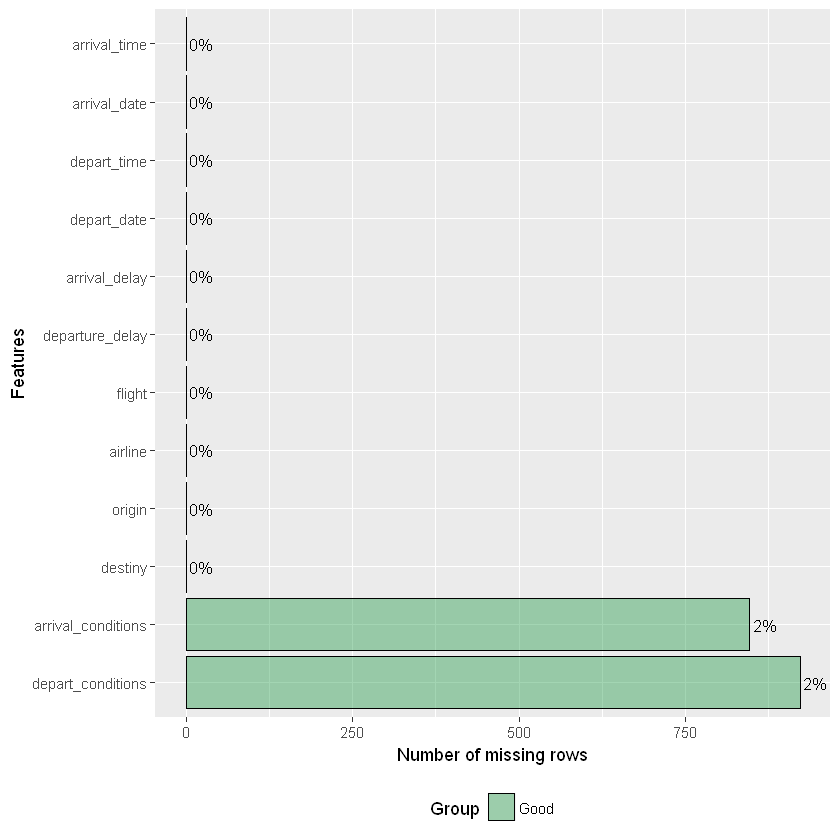

In [25]:
PlotMissing(flights)

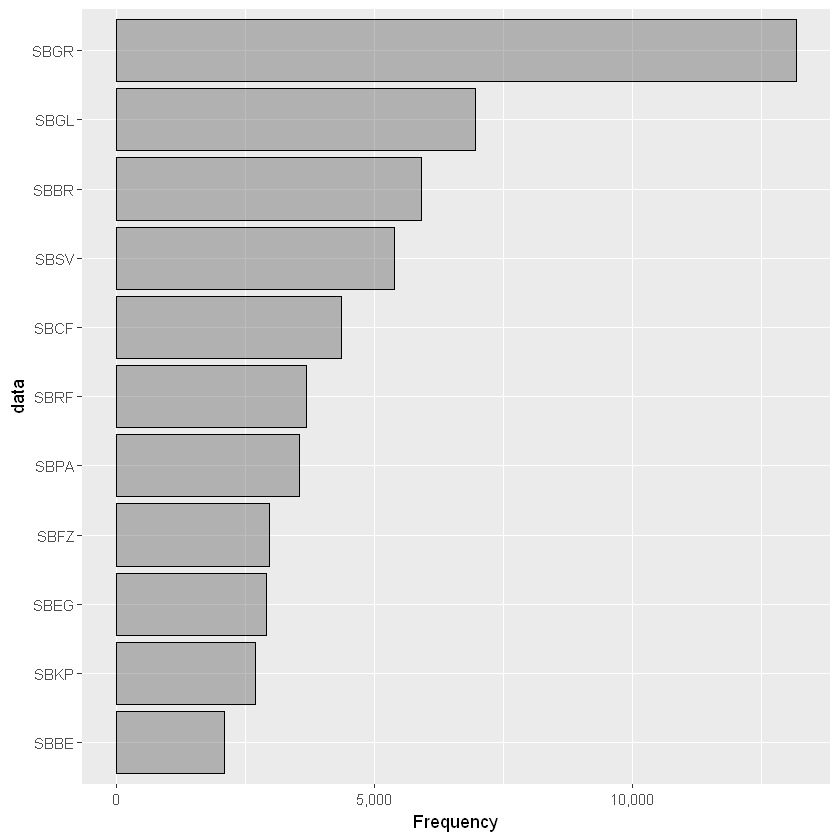

In [29]:
BarDiscrete(flights$origin)

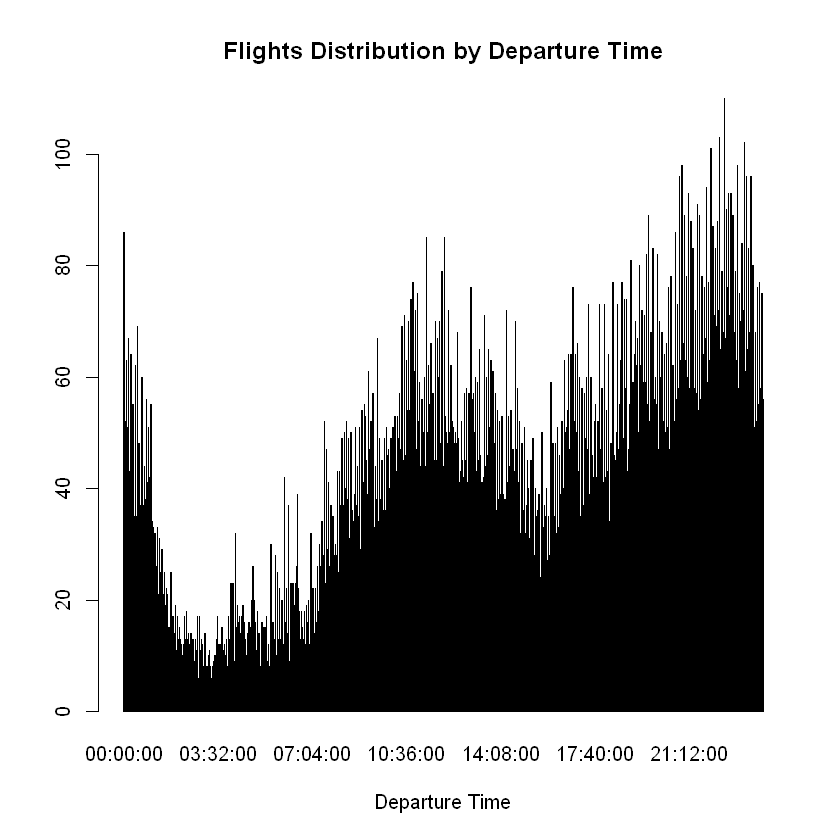

In [36]:
counts <- table(flights$depart_time)
barplot(counts, main="Flights Distribution by Departure Time", 
  	xlab="Departure Time")

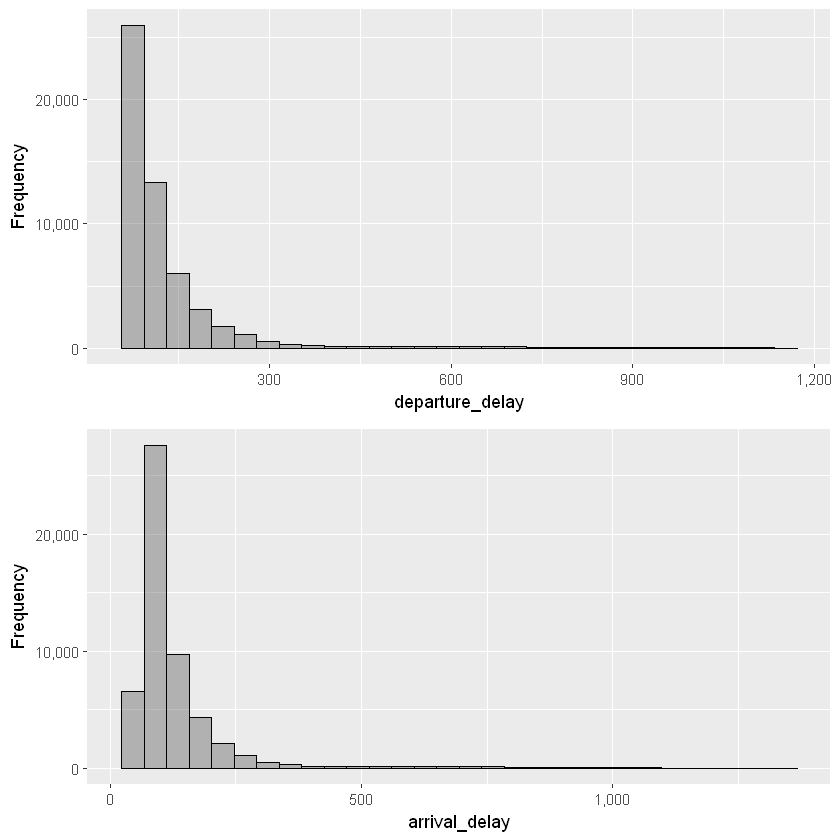

In [32]:
HistogramContinuous(flights)

8 columns ignored with more than 20 categories.
airline: 37 categories
flight: 2519 categories
depart_conditions: 32 categories
arrival_conditions: 34 categories
depart_date: 3220 categories
depart_time: 1440 categories
arrival_date: 3214 categories
arrival_time: 1440 categories



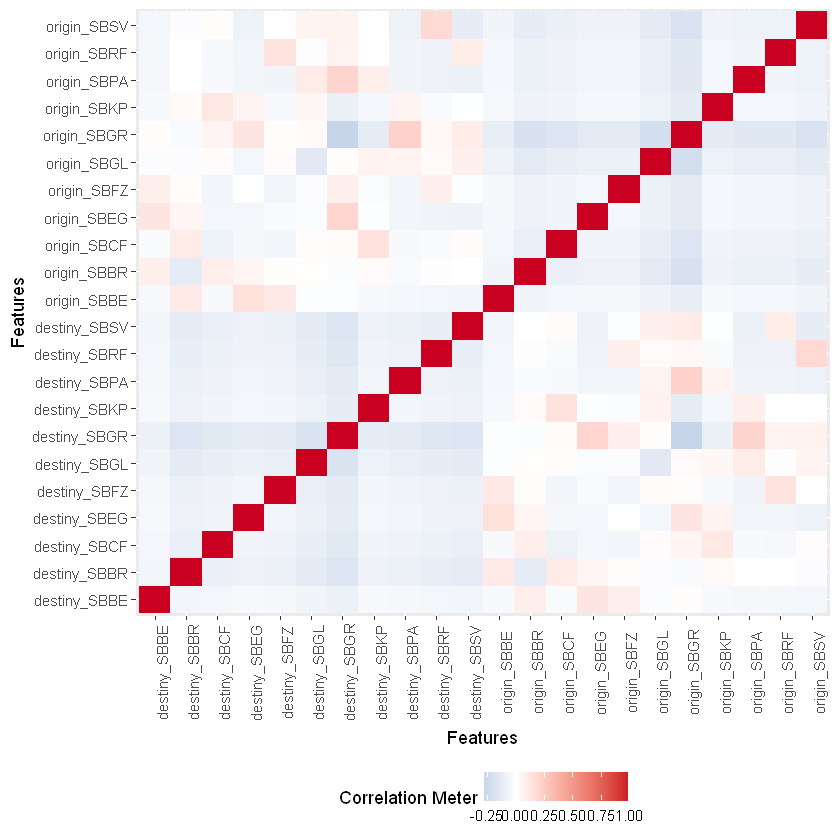

In [33]:
CorrelationDiscrete(flights)

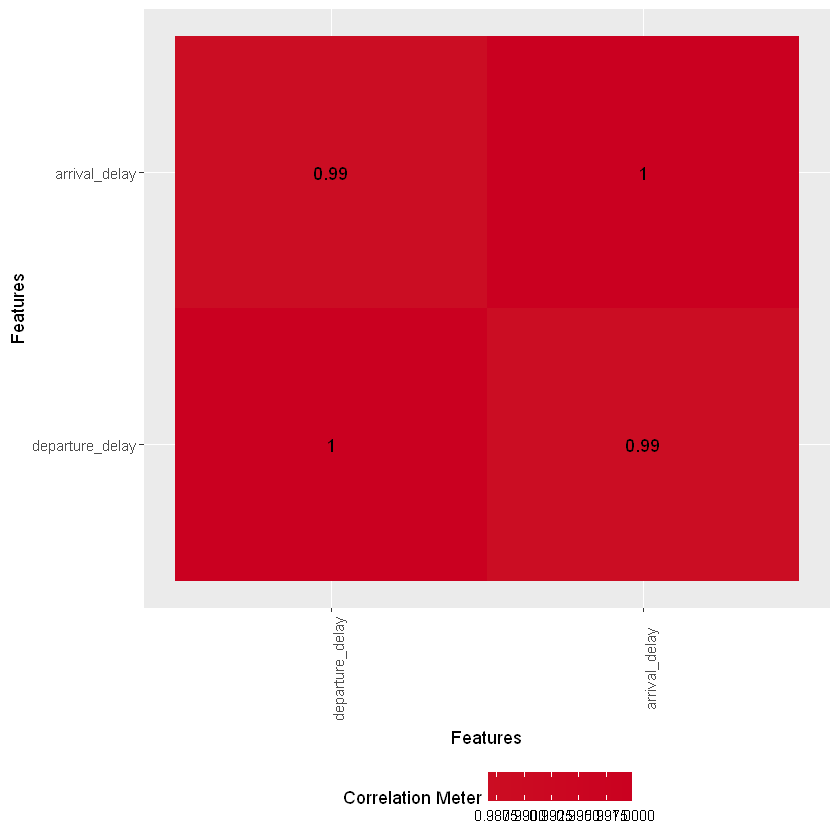

In [34]:
CorrelationContinuous(flights)

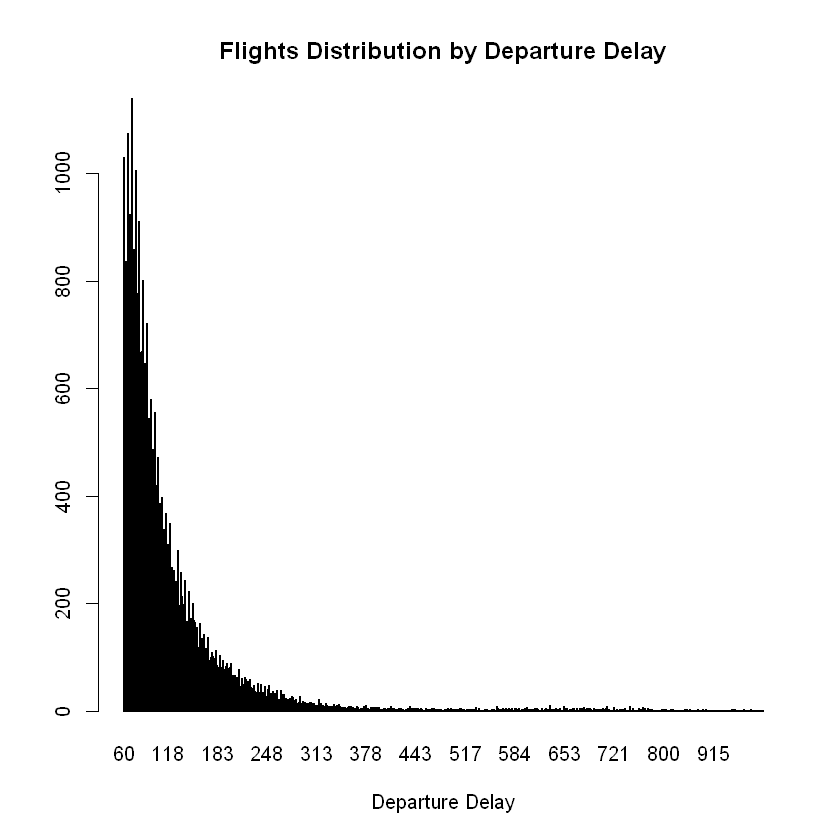

In [37]:
counts <- table(flights$departure_delay)
barplot(counts, main="Flights Distribution by Departure Delay", 
  	xlab="Departure Delay")

In [68]:
# Sum the flights delayed by departure time (HH)
query<-"select depart_time_HH, count(flight) as total_flights
        from (select substr(depart_time,1,2) as depart_time_HH, flight
              from   flights) 
        group by depart_time_HH
        order by total_flights"
print(query)

[1] "select depart_time_HH, count(flight) as total_flights\n        from (select substr(depart_time,1,2) as depart_time_HH, flight\n              from   flights) \n        group by depart_time_HH\n        order by total_flights"


In [69]:
result<-sqldf(query)

In [70]:
result

depart_time_HH,total_flights
03,531
02,600
05,648
04,810
06,895
01,1208
07,1370
15,1774
08,2028
09,2305


In [19]:
# Analisa a estatística descritiva das características departure_delay e arrival_delay que serão categorizadas
summary(flights$departure_delay)
summary(flights$arrival_delay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0    75.0    94.0   124.7   135.0  1138.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0    75.0    95.0   125.8   135.0  1360.0 

In [76]:
flights$depart_conditions <- as.factor(flights$depart_conditions)
flights$arrival_conditions <- as.factor(flights$arrival_conditions)

In [21]:
str(flights)

'data.frame':	53705 obs. of  12 variables:
 $ destiny           : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin            : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline           : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight            : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ departure_delay   : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay     : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_conditions : Factor w/ 31 levels " ","\xc2","Clear",..: 16 24 16 27 24 24 16 24 19 19 ...
 $ arrival_conditions: Factor w/ 33 levels " ","\xc2","Clear",..: 20 20 27 27 23 23 27 20 20 29 ...
 $ depart_date       : Factor w/ 3220 levels "2009-01-01","2009-01-02",..: 1 1 3 3 3 4 5 5 5 6 ...
 $ depart_time       : Factor w/ 1440 levels "00:00:00","00:01:00",..: 412 686 679 725 1324 905 576 1063 1408 1327 ...
 $ a

**Departure Time** is a key factor that we are going to examine.<br>
We want to know which time is the best time for flight.

In [71]:
## Categoriza as variáveis departure_delay e arrival_delay
flights$departure_delay <- ordered(cut(flights$departure_delay, c(60,75,125,240)),
                              labels = c("None", "Low", "High"))

flights$arrival_delay <- ordered(cut(flights$arrival_delay, c(60,75,125,240)),
                              labels = c("None", "Low", "High"))


In [73]:
## Categoriza a variável depart_time
flights$depart_time <- ordered(cut(as.integer(substr(flights$depart_time,1,2)), c(00,06,12,18,23)),
                              labels = c("Overnight", "Morning", "Afternoon", "Evening"))


In [74]:
head(flights)

destiny,origin,airline,flight,departure_delay,arrival_delay,depart_conditions,arrival_conditions,depart_date,depart_time,arrival_date,arrival_time
SBBE,SBEG,GLO,1697,None,None,Mostly Cloudy,Mostly Cloudy,2009-01-01,Overnight,2009-01-01,09:00:00
SBBE,SBBR,TAM,3716,None,Low,Scattered Clouds,Mostly Cloudy,2009-01-01,Morning,2009-01-01,14:02:00
SBBE,SBFZ,TAM,3890,None,None,Mostly Cloudy,Scattered Clouds,2009-01-03,Morning,2009-01-03,13:06:00
SBBE,SBBR,GLO,1928,None,Low,Thunderstorm,Scattered Clouds,2009-01-03,Morning,2009-01-03,14:46:00
SBBE,SBFZ,GLO,1830,Low,Low,Scattered Clouds,Partly Cloudy,2009-01-03,Evening,2009-01-03,23:55:00
SBBE,SBFZ,TAM,3454,Low,Low,Scattered Clouds,Partly Cloudy,2009-01-04,Afternoon,2009-01-04,16:53:00


In [107]:
# Sum the flights delayed during Overnight
query<-"select count(flight) from flights where depart_time='Overnight'"
print(query)

[1] "select count(flight) from flights where depart_time='Overnight'"


In [108]:
result<-sqldf(query)

In [109]:
result

count(flight)
4692


In [115]:
# Sum the flights delayed during Overnight and departure_delay='None'
query<-"select count(flight) from flights where depart_time='Overnight' and departure_delay='None'"
print(query)

[1] "select count(flight) from flights where depart_time='Overnight' and departure_delay='None'"


In [116]:
result_2<-sqldf(query)

In [117]:
result_2

count(flight)
900


Confidence = 0,1918 ou 19,18%

In [118]:
# Sum the flights delayed during Morning
query<-"select count(flight) from flights where depart_time='Morning'"
result_3<-sqldf(query)
result_3

count(flight)
14206


In [119]:
# Sum the flights delayed during Morning and departure_delay='None'
query<-"select count(flight) from flights where depart_time='Morning' and departure_delay='None'"
result_4<-sqldf(query)
result_4

count(flight)
3358


Confidence = 0,2363 ou 23,63%

In [121]:
# Sum the flights delayed during Afternoon
query<-"select count(flight) from flights where depart_time='Afternoon'"
result_5<-sqldf(query)
result_5

count(flight)
14573


In [122]:
# Sum the flights delayed during Afternoon and departure_delay='None'
query<-"select count(flight) from flights where depart_time='Afternoon' and departure_delay='None'"
result_6<-sqldf(query)
result_6

count(flight)
3689


Confidence = 0,2531 ou 25,31%

In [123]:
# Sum the flights delayed during Evening
query<-"select count(flight) from flights where depart_time='Evening'"
result_7<-sqldf(query)
result_7

count(flight)
17756


In [125]:
# Sum the flights delayed during Evening and departure_delay='None'
query<-"select count(flight) from flights where depart_time='Evening' and departure_delay='None'"
result_8<-sqldf(query)
result_8

count(flight)
4882


Confidence = 0,2749 ou 27,49%

**Flights Departed Without Delay**<br>
**Period of Time**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(%)**<br>
Overnight
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
19,18%<br>
Morning
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
23,63%<br>
Afternoon
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
25,31%<br>
<span style="color:blue">
Evening
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
27,49%</span><br>
<br><br>
**Conclusion:** The best time period to flight is from 19H to 23H (Evening)

Creating the transactions and running the Apriori Algorithm,
we have the same results.

In [124]:
## Cria as transações
train_set_transactions <- as(flights, "transactions")

In [78]:
train_set_transactions

transactions in sparse format with
 53705 transactions (rows) and
 17376 items (columns)

In [79]:
str(train_set_transactions)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:631382] 47 607 1086 1741 9428 9431 9449 9484 9498 12718 ...
  .. .. ..@ p       : int [1:53706] 0 12 24 36 48 60 72 84 96 108 ...
  .. .. ..@ Dim     : int [1:2] 17376 53705
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	17376 obs. of  3 variables:
  .. ..$ labels   : chr [1:17376] "destiny=CYYZ" "destiny=EDDF" "destiny=EDDM" "destiny=EGLL" ...
  .. ..$ variables: Factor w/ 12 levels "airline","arrival_conditions",..: 10 10 10 10 10 10 10 10 10 10 ...
  .. ..$ levels   : Factor w/ 13634 levels " ","\xc2","0",..: 12949 12963 12964 12977 12983 12988 12995 12996 13004 13020 ...
  ..@ itemsetInfo:'data.frame':	53705 obs. of  1 variable:
  .. ..$ transactionID: chr [1:53705] "1" "2" "3" "4" ...


In [80]:
head(train_set_transactions@data)
head(train_set_transactions@itemInfo)
head(train_set_transactions@itemsetInfo)

6 x 53705 sparse Matrix of class "ngCMatrix"
                                                                               
[1,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[2,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[3,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[4,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[5,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[6,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......

 .....suppressing columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

labels,variables,levels
destiny=CYYZ,destiny,CYYZ
destiny=EDDF,destiny,EDDF
destiny=EDDM,destiny,EDDM
destiny=EGLL,destiny,EGLL
destiny=EHAM,destiny,EHAM
destiny=ELLX,destiny,ELLX


transactionID
1
2
3
4
5
6


In [127]:
# Nesta parte do trabalho, executar-se-á o algoritmo APRIORI
# para gerar regras com a seguinte especificcação:
#
# 1. com suporte de 0,5, confiança de 0,9 e tamanho minimo = 2
# 2. com um atributo do lado esquerdo e um do lado direito e tamanho maximo=3
# 3. com lado direito limitado ao valor do atributo arrival_delay=None Arrival Delay
# 4. e lado esquerdo livre.
#
# Isso significa que estamos interessados em qualquer causa que provoque
# a consequência arrival_delay=High Arrival Delay. 
#rules <- apriori(train_set_transactions, parameter=list(supp = 0.01, conf = 0.8, minlen=1, maxlen= 10, target = "rules"), appearance=list(rhs = c("arrival_delay=High"),default="lhs"),control=NULL)
#rules <- apriori(train_set_transactions, parameter=list(conf = 0.9, minlen=1, maxlen= 10, target = "rules"), appearance=list(rhs = c("arrival_delay=None"),default="lhs"),control=NULL)
#rules <- apriori(train_set_transactions, parameter = list(supp = 0.9, conf = 0.9, target = "rules"), appearance=list(rhs = c("arrival_delay=High"),default="lhs"),control=NULL)
rules <- apriori(train_set_transactions, parameter = list(supp = 0.01, conf = 0.1, target = "rules"), appearance=list(lhs = c("depart_time=Evening"), rhs = c("departure_delay=None")),control=NULL)
rules_a <- as(rules, "data.frame")
head(rules_a)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 537 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[2 item(s), 53705 transaction(s)] done [0.07s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


rules,support,confidence,lift,count
{} => {departure_delay=None},0.24789126,0.2478913,1.000000,13313
{depart_time=Evening} => {departure_delay=None},0.09090401,0.2749493,1.109153,4882


In [128]:
irules <- inspect(rules)

    lhs                      rhs                    support    confidence
[1] {}                    => {departure_delay=None} 0.24789126 0.2478913 
[2] {depart_time=Evening} => {departure_delay=None} 0.09090401 0.2749493 
    lift     count
[1] 1.000000 13313
[2] 1.109153  4882


In [129]:
rules.sorted <- sort(rules, by="lift")
inspect(rules.sorted)

    lhs                      rhs                    support    confidence
[1] {depart_time=Evening} => {departure_delay=None} 0.09090401 0.2749493 
[2] {}                    => {departure_delay=None} 0.24789126 0.2478913 
    lift     count
[1] 1.109153  4882
[2] 1.000000 13313


Interpretando o resultado da primeira regra, temos:

SUPPORT = 0,015 significa que 1,5% das 53.705 transações, representam o padrão {airline=WEB, departure_delay=High}

CONFIDENCE = 0,92 significa que 92% das 53.705 transações que contém o padrão {airline=WEB, departure_delay=High} também contém o padrão {arrival_delay=High}

O lift de uma regra de associação A Þ B indica o quanto 
mais  freqüente  torna-se B, quando A ocorre.

Esta  medida  é  computada  por: 
Lift(A Þ B) = Conf(A Þ B) ÷ Sup(B). 

Indica que quando ocorre um voo com o padrão {airline=WEB, departure_delay=High} existe chance 4(quatro) vezes maior de ocorrer o padrão {arrival_delay=High}

{arrival_delay=High} significa um atraso entre 2 até 4 horas.